In [17]:
import numpy as np
import os
import cv2
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import random

In [18]:
def Noise_add(points,noise):
    n = len(points)
    noise_point = np.zeros((n,2))
    for i in range(n):
        noise_point[i][0] = points[i][0] + random.random()*noise
        noise_point[i][1] = points[i][1] + random.random()*noise
    return noise_point
def calculate_min_enclosing_square_side(contour):
    """
    Calculate the side length of the minimum envelope square of the contour coordinates of a two-dimensional closed curve
    :param contour: Contour coordinates of a 2D closed curve, shape : (N, 2) 
    :return: Side length of the minimum envelope square
    """
    contour = np.array(contour)
    
    x_coords = contour[:, 0]
    y_coords = contour[:, 1]
    
    x_min = np.min(x_coords)
    x_max = np.max(x_coords)
    y_min = np.min(y_coords)
    y_max = np.max(y_coords)
    
    width = x_max - x_min
    height = y_max - y_min
    
    side_length = max(width, height)
    
    return side_length

In [22]:
# Load datasets：
# datasets = ['kimia99','flavia','kidney','liver']
datasets = ['liver']
ii = 0
# max = 0
for dataset in datasets:
    train_data_with_noi = []
    train_label_with_noi = []
    data_path = f'../data/retrieval/contour/{dataset}_rec_test_data_360.npy'
    label_path = f'../data/retrieval/contour/{dataset}_rec_test_label_360.npy'
    contour = np.load(data_path)
    label = np.load(label_path)
    contour_downsample = contour[::72]
    label_downsample = label[::72]
    for index,linei in enumerate(contour_downsample):
        temp = calculate_min_enclosing_square_side(linei)
        # if temp>max:
        #     max = temp
        # print(calculate_min_enclosing_square_side(linei))
        Noise_level = calculate_min_enclosing_square_side(linei)/12/2
        for i_scale in range(1):
            deg = 0
            noise = i_scale*0.3*Noise_level
            temp = Noise_add(linei,noise)
            train_data_with_noi.append(temp)
            train_label_with_noi.append(label_downsample[index])
        # ###
        # print(linei.shape)
        # plt.plot(nlinei[:,0],nlinei[:,1],'-')
        # break
    # print('max = ',max)
    np.save(f'../data/noise/contour/noise_and_rot_{dataset}_rec_train_data_0_new.npy',np.asarray(train_data_with_noi))
    np.save(f'../data/noise/contour/noise_and_rot_{dataset}_rec_train_label_0_new.npy',np.asarray(train_label_with_noi))
    ii+=1
    break

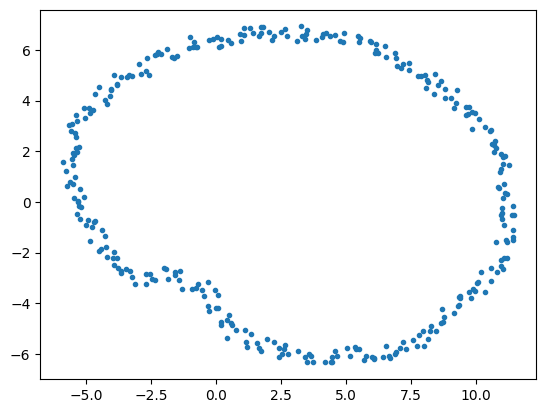

In [21]:
k=3
plt.plot(train_data_with_noi[k][:,0],train_data_with_noi[k][:,1],'.')